#                              Ad Campaign Capstone Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style="darkgrid")
pd.set_option('display.max_columns', 0)
plt.style.use('ggplot')
pd.options.display.float_format = '{:.2f}'.format
import csv
import pandas_profiling
from pandas_profiling import ProfileReport
import seaborn as sns
%matplotlib inline
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objs as go
import plotly.io as pio
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
from mpl_toolkits.basemap import Basemap
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from shapely.geometry import MultiPoint

In [2]:
# Modelling
import sklearn.metrics as metrics
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression , LinearRegression
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from mlxtend.classifier import StackingCVClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn import model_selection
from xgboost import XGBClassifier, XGBRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,roc_auc_score,f1_score,roc_curve
from sklearn.metrics import confusion_matrix,roc_auc_score,classification_report,mean_squared_error,r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
import math
from math import sqrt
from sklearn.pipeline import make_pipeline

In [3]:
pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)

### We are not going to take all data but a sample of it because,
### data is so huge that locally, colab both of the places kernal crashes due high data points at merging dataset and dbscan

## 1. Read Data

In [4]:
#app_events
app_events = pd.read_csv('app_events.csv')

In [5]:
app_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32473067 entries, 0 to 32473066
Data columns (total 4 columns):
 #   Column        Dtype
---  ------        -----
 0   event_id      int64
 1   app_id        int64
 2   is_installed  int64
 3   is_active     int64
dtypes: int64(4)
memory usage: 991.0 MB


In [6]:
app_events.head(5)

event_id               app_id  is_installed  is_active
0         2  5927333115845830913             1          1
1         2 -5720078949152207372             1          0
2         2 -1633887856876571208             1          0
3         2  -653184325010919369             1          1
4         2  8693964245073640147             1          1

In [7]:
len(app_events)

32473067

In [8]:
### There are about 32M data thats huge to compute we will take We will take 10% data
new_app_events = app_events.groupby('is_active', group_keys=False).apply(lambda x: x.sample(frac=0.1))

In [9]:
len(new_app_events)

3247307

In [10]:
#train_event_data
train_event_data =  pd.read_csv('train_event_data.csv')

In [11]:
train_event_data.head(5)

device_id gender  age group_train   event_id  \
0 -7548291590301750000      M   33        M32+ 2369465.00   
1 -7548291590301750000      M   33        M32+ 1080869.00   
2 -7548291590301750000      M   33        M32+ 1079338.00   
3 -7548291590301750000      M   33        M32+ 1078881.00   
4 -7548291590301750000      M   33        M32+ 1068711.00   

         datetimestamp  latitude  longitude  
0  2016-05-03 15:55:35     33.98     116.79  
1  2016-05-03 06:07:16     33.98     116.79  
2  2016-05-04 03:28:02     33.98     116.79  
3  2016-05-04 02:53:08     33.98     116.79  
4  2016-05-03 15:59:35     33.98     116.79

In [12]:
train_event_data['Event_status'] = np.where(train_event_data['event_id'].isna(),0,1)

In [13]:
len(train_event_data)

1266933

In [14]:
### We will take 10% data i.e around 1 lakh data which would be 10%
new_train_event_data = train_event_data.groupby('Event_status', group_keys=False).apply(lambda x: x.sample(frac=0.15))

In [15]:
len(new_train_event_data)

190040

In [16]:
#app_events_meta_data
app_events_meta_data = pd.read_csv('app_events_meta_data.csv', encoding='utf-8', quoting=csv.QUOTE_NONE)

In [17]:
app_events_meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459944 entries, 0 to 459943
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   app_id    459944 non-null  object
 1   label_id  459944 non-null  object
 2   category  459944 non-null  object
dtypes: object(3)
memory usage: 10.5+ MB


In [18]:
app_events_meta_data = app_events_meta_data.iloc[1: , :]

In [19]:
app_events_meta_data.head(5)

app_id label_id         category
1   7324884708820027918      251          Finance
2  -4494216993218550286      251          Finance
3   6058196446775239644      406          unknown
4   6058196446775239644      407  DS_P2P net loan
5   8694625920731541625      406          unknown

In [20]:
#train_mobile_brand
train_mobile_brand = pd.read_csv("train_mobile_brand.csv")

In [21]:
train_mobile_brand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74840 entries, 0 to 74839
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   device_id     74840 non-null  int64 
 1   gender        74840 non-null  object
 2   age           74840 non-null  int64 
 3   group_train   74840 non-null  object
 4   phone_brand   74840 non-null  object
 5   device_model  74840 non-null  object
dtypes: int64(2), object(4)
memory usage: 3.4+ MB


In [22]:
train_mobile_brand.head(5)

device_id gender  age group_train phone_brand device_model
0 -7548291590301750000      M   33        M32+      Huawei     è£è€€3C
1  6943568600617760000      M   37        M32+      Xiaomi        xnote
2  5441349705980020000      M   40        M32+        OPPO          R7s
3 -5393876656119450000      M   33        M32+      Xiaomi         MI 4
4  4543988487649880000      M   53        M32+     samsung    Galaxy S4

## 2. Cleaning Data

### Working on converting columns to right datatypes
### The dataframe train_event_data has columns to be converted to right datatype

In [23]:
## Column datetimestamp from string to timestamp
new_train_event_data['datetimestamp'] = pd.to_datetime(new_train_event_data['datetimestamp'])

In [24]:
new_train_event_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190040 entries, 1261416 to 846458
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   device_id      190040 non-null  int64         
 1   gender         190040 non-null  object        
 2   age            190040 non-null  int64         
 3   group_train    190040 non-null  object        
 4   event_id       182340 non-null  float64       
 5   datetimestamp  182340 non-null  datetime64[ns]
 6   latitude       182340 non-null  float64       
 7   longitude      182340 non-null  float64       
 8   Event_status   190040 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(2), object(2)
memory usage: 13.8+ MB


In [25]:
new_train_event_data.head()

device_id gender  age group_train  event_id datetimestamp  \
1261416  -499923429195376000      F   40        F32+       NaN           NaT   
1217598  3946517152309450000      M   22       M0-24       NaN           NaT   
1228532 -6206829862008590000      F   34        F32+       NaN           NaT   
1252813 -3414553946043800000      M   27      M25-32       NaN           NaT   
1225741 -8189152762681480000      F   33        F32+       NaN           NaT   

         latitude  longitude  Event_status  
1261416       NaN        NaN             0  
1217598       NaN        NaN             0  
1228532       NaN        NaN             0  
1252813       NaN        NaN             0  
1225741       NaN        NaN             0

## Lets look at Geospatial data

### Scenario - 1 -- A user enables the location on their device while using an app. In a way, the location or event id generated against any activity will have location data.

In [26]:
new_train_event_data.shape

(190040, 9)

In [27]:
train_event_dataScenario1 = new_train_event_data[~(((new_train_event_data.longitude == 0)&(new_train_event_data.latitude ==0))|((new_train_event_data.event_id.isnull())))]

### Scenario 2: The user activity is unavailable, thereby leaving you with only device information. 

In [28]:
train_event_dataScenario2 = new_train_event_data[(((new_train_event_data.longitude == 0)&(new_train_event_data.latitude ==0))|((new_train_event_data.event_id.isnull())))]

In [29]:
del train_event_dataScenario1

In [30]:
del train_event_dataScenario2

### We will create these scenario level data again one all csv's are merged 

## Checking null & Missing values

In [31]:
new_app_events.isnull().sum()

event_id        0
app_id          0
is_installed    0
is_active       0
dtype: int64

In [32]:
new_train_event_data.isnull().sum()

device_id           0
gender              0
age                 0
group_train         0
event_id         7700
datetimestamp    7700
latitude         7700
longitude        7700
Event_status        0
dtype: int64

### will not be dropping these value because these are those record which have no event data but have device data . which will be used later for EDA purpose

In [33]:
app_events_meta_data.isnull().sum()

app_id      0
label_id    0
category    0
dtype: int64

In [34]:
train_mobile_brand.isnull().sum()

device_id       0
gender          0
age             0
group_train     0
phone_brand     0
device_model    0
dtype: int64

### Extracting columns from datetimestamp

In [35]:
new_train_event_data['day'] = new_train_event_data['datetimestamp'].dt.weekday
new_train_event_data['hour'] = new_train_event_data['datetimestamp'].dt.hour
new_train_event_data['month'] = new_train_event_data['datetimestamp'].dt.month
new_train_event_data['day_name'] = new_train_event_data['datetimestamp'].dt.day_name()

In [36]:
def func(x):
    if x < 25:
        return "0-24"
    elif x < 33:
        return "25-32"
    elif x < 46:
        return "33-45"
    else:
        return '45+'

In [37]:
new_train_event_data['age_group'] = new_train_event_data['age'].apply(func)

In [38]:
new_train_event_data.head()

device_id gender  age group_train  event_id datetimestamp  \
1261416  -499923429195376000      F   40        F32+       NaN           NaT   
1217598  3946517152309450000      M   22       M0-24       NaN           NaT   
1228532 -6206829862008590000      F   34        F32+       NaN           NaT   
1252813 -3414553946043800000      M   27      M25-32       NaN           NaT   
1225741 -8189152762681480000      F   33        F32+       NaN           NaT   

         latitude  longitude  Event_status  day  hour  month day_name  \
1261416       NaN        NaN             0  NaN   NaN    NaN      NaN   
1217598       NaN        NaN             0  NaN   NaN    NaN      NaN   
1228532       NaN        NaN             0  NaN   NaN    NaN      NaN   
1252813       NaN        NaN             0  NaN   NaN    NaN      NaN   
1225741       NaN        NaN             0  NaN   NaN    NaN      NaN   

        age_group  
1261416     33-45  
1217598      0-24  
1228532     33-45  
1252813     25-32  
1225741     33-45

### Similarly age group for train_mobile_brand

In [39]:
train_mobile_brand['age_group'] = train_mobile_brand['age'].apply(func)

In [40]:
train_mobile_brand.head()

device_id gender  age group_train phone_brand device_model  \
0 -7548291590301750000      M   33        M32+      Huawei     è£è€€3C   
1  6943568600617760000      M   37        M32+      Xiaomi        xnote   
2  5441349705980020000      M   40        M32+        OPPO          R7s   
3 -5393876656119450000      M   33        M32+      Xiaomi         MI 4   
4  4543988487649880000      M   53        M32+     samsung    Galaxy S4   

  age_group  
0     33-45  
1     33-45  
2     33-45  
3     33-45  
4       45+

## 3. Basic EDA & Visualization , Feature Engineering

## Univariate Analysis

### 1. Age

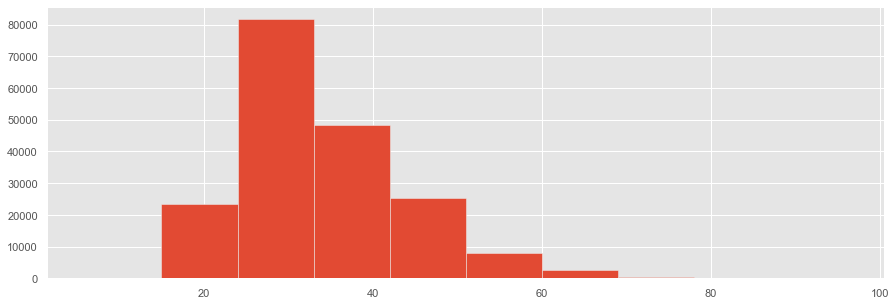

In [41]:
plt.figure(figsize=(15,5))
plt.hist(new_train_event_data['age'], bins=10)
plt.show()

<Figure size 1080x360 with 0 Axes>

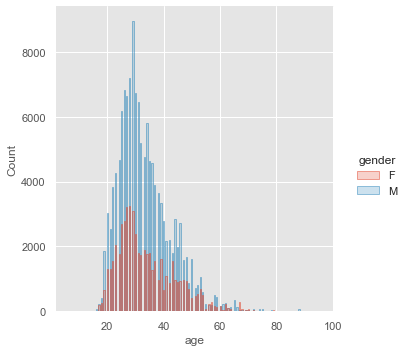

In [42]:
plt.figure(figsize=(15,5))
sns.displot(new_train_event_data, x="age", hue="gender", element="step")
plt.show()

### Analysis: Most of data falls between the age 25 - 45

#### 2. Gender

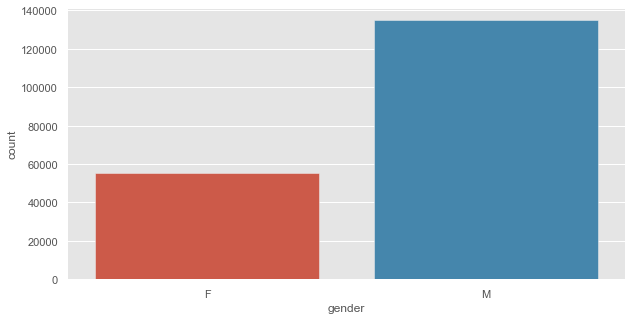

In [43]:
plt.figure(figsize=(10,5))
sns.countplot(x ='gender', data = new_train_event_data)
plt.show()

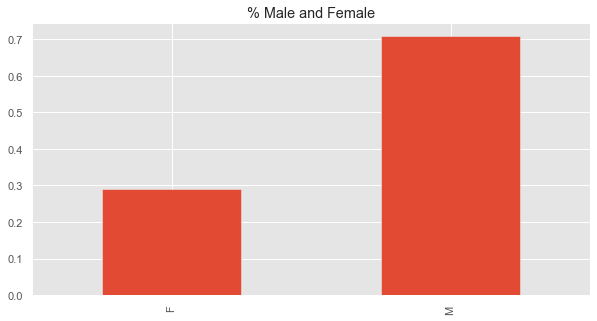

In [44]:
plt.figure(figsize=(10,5))
new_train_event_data.gender.value_counts(normalize=True,ascending=True).plot.bar(title="% Male and Female")
plt.show()

Unique age numbers   :  [40 22 34 27 33 32 28 30 29 39 37 20 25 42 38 23 35 60 47 43 26 75 21 24
 48 49 41 72 64 19 45 50 31 18 36 46 51 65 56 44 77 52 58 53 17 68 54 96
 63 62 16 11 59 66 55 71 61 67 57 76 14 13 74 83 69 73 15 12 80 70  6 79
 81 78 85 82 88]

 train group with age :  ['F32+' 'M0-24' 'M25-32' 'M32+' 'F25-32' 'F0-24']




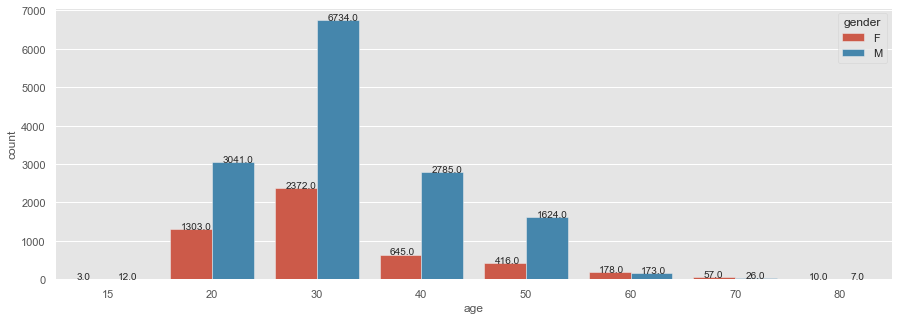

In [45]:
print("Unique age numbers   : ",new_train_event_data.age.unique())
print("\n train group with age : ",new_train_event_data.group_train.unique())
print("\n")
plt.figure(figsize=(15,5))
ax = sns.countplot(data = new_train_event_data, x="age", hue='gender', order = [15,20,30,40,50,60,70,80])
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.10, p.get_height()+0.01))
plt.show()

### Analysis: Data displays Male with 70% and Female with 30%

## Bivariate Analysis

### Boxplot

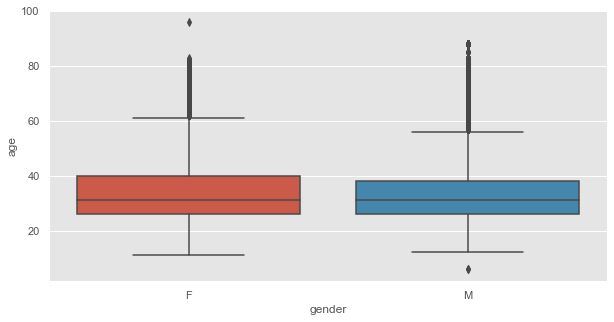

In [46]:
plt.figure(figsize=(10,5))
sns.boxplot(x='gender', y='age', data=new_train_event_data)
plt.show()

### Analysis:
### 1. The above boxplots show that  most of the people are under the age between 25-40. 

### EDA for Trend data

### percentage of device_ids with and without event data 

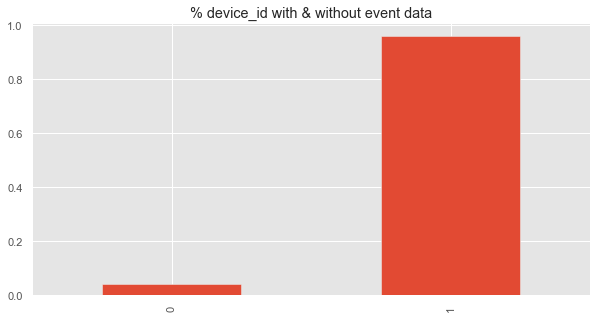

In [47]:
plt.figure(figsize=(10,5))
new_train_event_data.Event_status.value_counts(normalize=True,ascending=True).plot.bar(title="% device_id with & without event data")
plt.show()

### Graph representing the distribution of events on different days of a week 

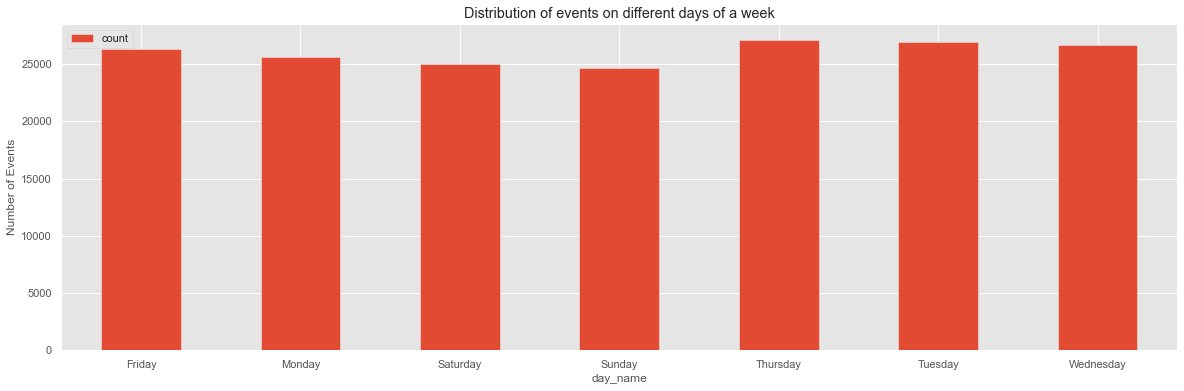

In [48]:
new_train_event_data.groupby('day_name').size().reset_index(name='count').plot(kind='bar', x='day_name',title='Distribution of events on different days of a week', ylabel='Number of Events',figsize=(20,6))
plt.xticks(rotation=0)
plt.show()

In [49]:
start_date = '2016-05-01 00:00:00'
end_date = '2016-05-07 23:59:00'
mask = (new_train_event_data['datetimestamp'] >= start_date) & (new_train_event_data['datetimestamp'] <= end_date)
one_week_df = new_train_event_data.loc[mask]

### Graph representing the distribution of events per hour (for one-week data)

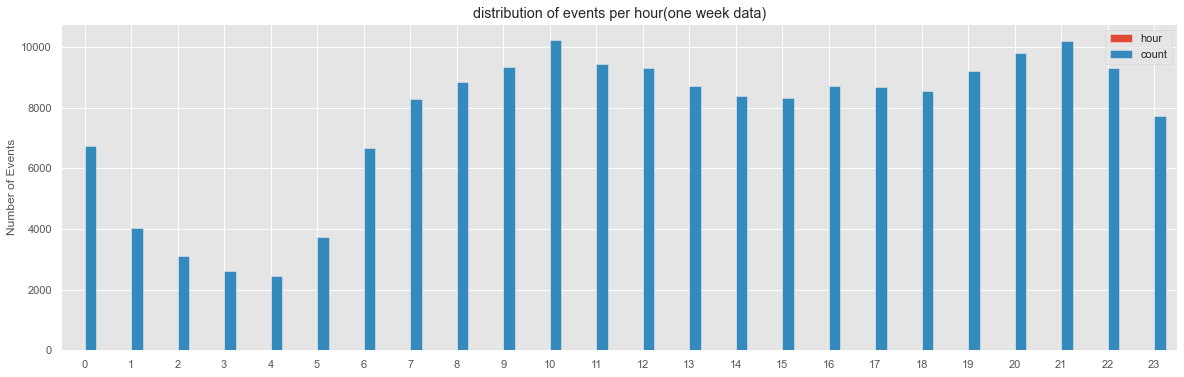

In [50]:
one_week_df.groupby('hour').size().reset_index(name='count').plot(kind='bar', title='distribution of events per hour(one week data)', ylabel='Number of Events',figsize=(20,6))
plt.xticks(rotation=0)
plt.show()

### The difference in the distribution of events per hour for males and females (Show the difference using an appropriate chart for one week’s data)

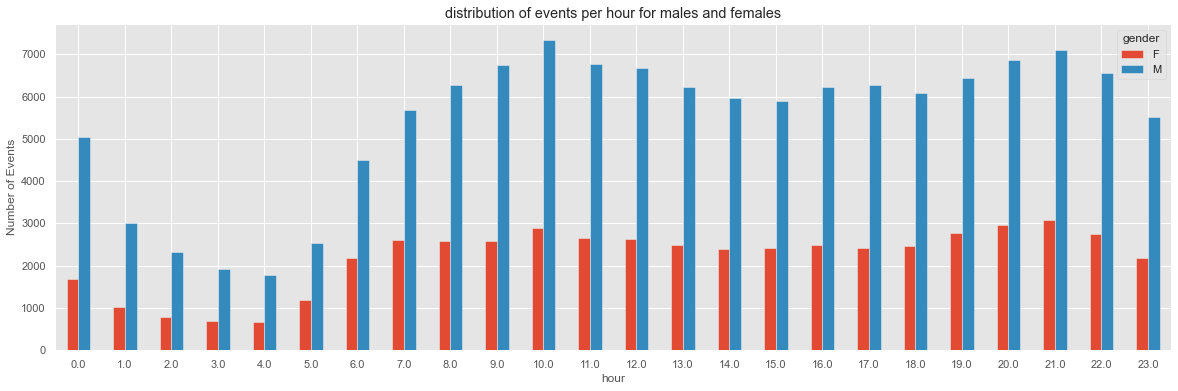

In [51]:
one_week_df.groupby(['hour','gender']).size().unstack().plot(kind='bar', title='distribution of events per hour for males and females', ylabel='Number of Events',figsize=(20,6))
plt.xticks(rotation=0)
plt.show()

### distribution of events for different age groups over different days of week? (Consider the age groups as 0–24, 25–32, 33–45, 46+]

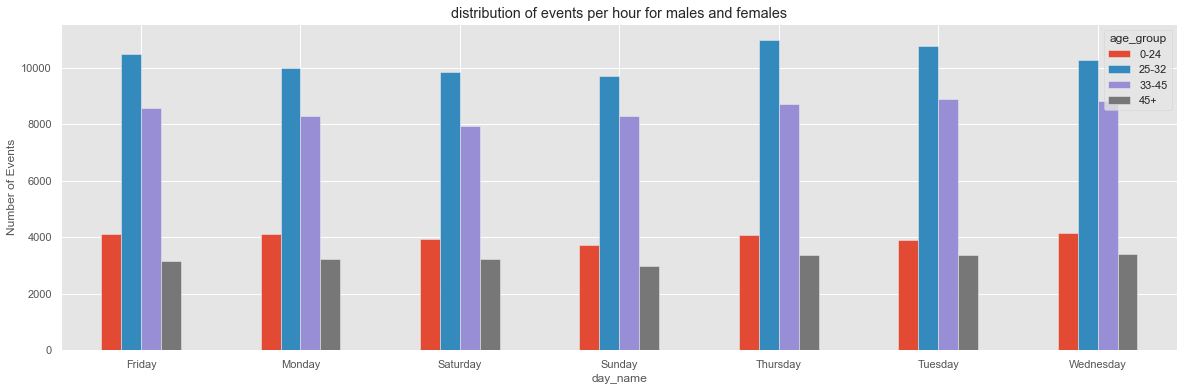

In [52]:
one_week_df.groupby(['day_name','age_group']).size().unstack().plot(kind='bar', title='distribution of events per hour for males and females', ylabel='Number of Events',figsize=(20,6))
plt.xticks(rotation=0)
plt.show()

In [53]:
del one_week_df

In [54]:
counts =train_mobile_brand.groupby(['gender','phone_brand']).phone_brand.count().nlargest(18).unstack()
print(counts)

phone_brand   Xiaomi  Huawei  samsung   Meizu    OPPO    vivo  Coolpad  \
gender                                                                   
F            5930.00 4257.00  5443.00 1306.00 2581.00 2660.00  1079.00   
M           11407.00 8744.00  8263.00 3404.00 3221.00 2998.00  2270.00   

phone_brand  lenovo  Gionee    HTC  
gender                              
F            894.00     NaN    NaN  
M           1801.00  721.00 694.00  


### Stacked bar chart for the top 10 mobile brands across male and female consumers

<Figure size 1440x1080 with 0 Axes>

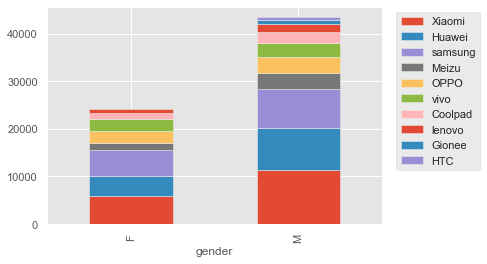

In [55]:
plt.figure(figsize=(20,15))
counts.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.31,1))
plt.show()

### Preparing data for frequent application wrt gender

### Event_data & Non_event_data

In [56]:
event_data = new_train_event_data[~(((new_train_event_data.longitude == 0)&(new_train_event_data.latitude ==0))|((new_train_event_data.event_id.isnull())))]

In [57]:
non_event_data = new_train_event_data[(((new_train_event_data.longitude == 0)&(new_train_event_data.latitude ==0))|((new_train_event_data.event_id.isnull())))]

In [58]:
merged_events = event_data.merge(train_mobile_brand, on='device_id', how='left')

In [59]:
merged_events.drop(['gender_x', 'age_x', 'group_train_x'], axis = 1, inplace = True) 
merged_events.rename(columns={"gender_y": "gender", "age_y": "age", "group_train_y": "group_train","age_group_y":"age_group"}, inplace = True)

In [60]:
merged_events.isnull().sum()* 100 / len(merged_events)

device_id       0.00
event_id        0.00
datetimestamp   0.00
latitude        0.00
longitude       0.00
Event_status    0.00
day             0.00
hour            0.00
month           0.00
day_name        0.00
age_group_x     0.00
gender          0.00
age             0.00
group_train     0.00
phone_brand     0.00
device_model    0.00
age_group       0.00
dtype: float64

In [61]:
merged_app = new_app_events.merge(app_events_meta_data, on='app_id', how='left')

In [62]:
merged_app.head(3)

event_id                app_id  is_installed  is_active label_id  \
0    420559  -1633933922436094199             1          0     1020   
1     47705   8096758179979414311             1          0      695   
2    914216   6989638496562408848             1          0      959   

           category  
0  Bank Credit Card  
1  Smart Appliances  
2         financial

In [63]:
merged_app.isnull().sum()* 100 / len(merged_app)

event_id       0.00
app_id         0.00
is_installed   0.00
is_active      0.00
label_id       9.08
category       9.08
dtype: float64

In [64]:
## Dropping na values because we can't fill them with any values
merged_app.dropna(subset=['label_id', 'category'], how='all', inplace=True)

In [65]:
merged_app.isnull().sum()* 100 / len(merged_app)

event_id       0.00
app_id         0.00
is_installed   0.00
is_active      0.00
label_id       0.00
category       0.00
dtype: float64

In [66]:
final_event_data = merged_events.merge(merged_app, on='event_id', how='left')

In [67]:
final_event_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238654 entries, 0 to 238653
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   device_id      238654 non-null  int64         
 1   event_id       238654 non-null  float64       
 2   datetimestamp  238654 non-null  datetime64[ns]
 3   latitude       238654 non-null  float64       
 4   longitude      238654 non-null  float64       
 5   Event_status   238654 non-null  int32         
 6   day            238654 non-null  float64       
 7   hour           238654 non-null  float64       
 8   month          238654 non-null  float64       
 9   day_name       238654 non-null  object        
 10  age_group_x    238654 non-null  object        
 11  gender         238654 non-null  object        
 12  age            238654 non-null  int64         
 13  group_train    238654 non-null  object        
 14  phone_brand    238654 non-null  object        
 15  

In [68]:
final_event_data['is_installed'].value_counts().sort_values(ascending=False)

1.00    128659
Name: is_installed, dtype: int64

### is installed always have 1 and no 0, it's not adding any value hence dropping.
### we have extracted dayname,hour,month,day from datetimestamp hence dropping
### Event_status for event_data will always be 1 hence dropping

In [69]:
final_event_data.drop(['is_installed', 'datetimestamp', 'Event_status'], axis = 1, inplace = True)

In [70]:
## Dropping na values because we can't fill them with any values
final_event_data.dropna(subset=['app_id', 'is_active'], how='all', inplace=True)

In [71]:
## Dropping na values because we can't fill them with any values
final_event_data.dropna(subset=['label_id', 'category'], how='all', inplace=True)

In [72]:
final_event_data.isnull().sum() * 100 / len(final_event_data)

device_id      0.00
event_id       0.00
latitude       0.00
longitude      0.00
day            0.00
hour           0.00
month          0.00
day_name       0.00
age_group_x    0.00
gender         0.00
age            0.00
group_train    0.00
phone_brand    0.00
device_model   0.00
age_group      0.00
app_id         0.00
is_active      0.00
label_id       0.00
category       0.00
dtype: float64

In [73]:
final_event_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128659 entries, 2 to 238640
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   device_id     128659 non-null  int64  
 1   event_id      128659 non-null  float64
 2   latitude      128659 non-null  float64
 3   longitude     128659 non-null  float64
 4   day           128659 non-null  float64
 5   hour          128659 non-null  float64
 6   month         128659 non-null  float64
 7   day_name      128659 non-null  object 
 8   age_group_x   128659 non-null  object 
 9   gender        128659 non-null  object 
 10  age           128659 non-null  int64  
 11  group_train   128659 non-null  object 
 12  phone_brand   128659 non-null  object 
 13  device_model  128659 non-null  object 
 14  age_group     128659 non-null  object 
 15  app_id        128659 non-null  object 
 16  is_active     128659 non-null  float64
 17  label_id      128659 non-null  object 
 18  cate

### non_event_data cleaning

In [74]:
non_event_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60742 entries, 1261416 to 610549
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   device_id      60742 non-null  int64         
 1   gender         60742 non-null  object        
 2   age            60742 non-null  int64         
 3   group_train    60742 non-null  object        
 4   event_id       53042 non-null  float64       
 5   datetimestamp  53042 non-null  datetime64[ns]
 6   latitude       53042 non-null  float64       
 7   longitude      53042 non-null  float64       
 8   Event_status   60742 non-null  int32         
 9   day            53042 non-null  float64       
 10  hour           53042 non-null  float64       
 11  month          53042 non-null  float64       
 12  day_name       53042 non-null  object        
 13  age_group      60742 non-null  object        
dtypes: datetime64[ns](1), float64(6), int32(1), int64(2), object(4)

In [75]:
non_event_data.head()

device_id gender  age group_train  event_id datetimestamp  \
1261416  -499923429195376000      F   40        F32+       NaN           NaT   
1217598  3946517152309450000      M   22       M0-24       NaN           NaT   
1228532 -6206829862008590000      F   34        F32+       NaN           NaT   
1252813 -3414553946043800000      M   27      M25-32       NaN           NaT   
1225741 -8189152762681480000      F   33        F32+       NaN           NaT   

         latitude  longitude  Event_status  day  hour  month day_name  \
1261416       NaN        NaN             0  NaN   NaN    NaN      NaN   
1217598       NaN        NaN             0  NaN   NaN    NaN      NaN   
1228532       NaN        NaN             0  NaN   NaN    NaN      NaN   
1252813       NaN        NaN             0  NaN   NaN    NaN      NaN   
1225741       NaN        NaN             0  NaN   NaN    NaN      NaN   

        age_group  
1261416     33-45  
1217598      0-24  
1228532     33-45  
1252813     25-32  
1225741     33-45

In [76]:
non_event_data.drop(['event_id', 'datetimestamp', 'Event_status','latitude','longitude','day','hour','month','day_name'], axis = 1, inplace = True)

In [77]:
final_non_event_data = non_event_data.merge(train_mobile_brand, on='device_id', how='left')

In [78]:
final_non_event_data.isnull().sum() * 100 / len(final_non_event_data)

device_id       0.00
gender_x        0.00
age_x           0.00
group_train_x   0.00
age_group_x     0.00
gender_y        0.00
age_y           0.00
group_train_y   0.00
phone_brand     0.00
device_model    0.00
age_group_y     0.00
dtype: float64

In [79]:
final_non_event_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60953 entries, 0 to 60952
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   device_id      60953 non-null  int64 
 1   gender_x       60953 non-null  object
 2   age_x          60953 non-null  int64 
 3   group_train_x  60953 non-null  object
 4   age_group_x    60953 non-null  object
 5   gender_y       60953 non-null  object
 6   age_y          60953 non-null  int64 
 7   group_train_y  60953 non-null  object
 8   phone_brand    60953 non-null  object
 9   device_model   60953 non-null  object
 10  age_group_y    60953 non-null  object
dtypes: int64(3), object(8)
memory usage: 5.6+ MB


In [80]:
final_non_event_data.head(3)

device_id gender_x  age_x group_train_x age_group_x gender_y  \
0  -499923429195376000        F     40          F32+       33-45        F   
1  3946517152309450000        M     22         M0-24        0-24        M   
2 -6206829862008590000        F     34          F32+       33-45        F   

   age_y group_train_y phone_brand device_model age_group_y  
0     40          F32+       Meizu       é­…è“       33-45  
1     22         M0-24        OPPO        R827T        0-24  
2     34          F32+     samsung       S5830I       33-45

In [81]:
final_non_event_data.drop(['gender_x', 'age_x', 'group_train_x','age_group_x'], axis = 1, inplace = True) 
final_non_event_data.rename(columns={"gender_y": "gender", "age_y": "age", "group_train_y": "group_train","age_group_y":"age_group"}, inplace = True)

In [82]:
final_non_event_data.head(3)

device_id gender  age group_train phone_brand device_model  \
0  -499923429195376000      F   40        F32+       Meizu       é­…è“   
1  3946517152309450000      M   22       M0-24        OPPO        R827T   
2 -6206829862008590000      F   34        F32+     samsung       S5830I   

  age_group  
0     33-45  
1      0-24  
2     33-45

In [83]:
final_non_event_data.isnull().sum() * 100 / len(final_event_data)

device_id      0.00
gender         0.00
age            0.00
group_train    0.00
phone_brand    0.00
device_model   0.00
age_group      0.00
dtype: float64

In [84]:
temp = final_event_data.loc[final_event_data.is_active.notnull()]
temp1 = temp.groupby(['app_id']).size().\
        sort_values(ascending=False).head(10).reset_index(name='count')

temp2 = temp[temp['app_id'].isin(temp1['app_id'].tolist())]
temp_m = temp2[temp2['gender']=='M'].groupby(['app_id']).size().reset_index(name='m_count')
temp_f = temp2[temp2['gender']=='F'].groupby(['app_id']).size().reset_index(name='f_count')

data_frames = [temp1, temp_m, temp_f]
from functools import reduce

df_plot = reduce(lambda  left,right: pd.merge(left,right,on=['app_id'],
                                            how='outer'), data_frames)

df_plot = df_plot.sort_values(by=['count'], ascending = False)
df_plot['app_id'] = df_plot['app_id'].astype(str)
df_plot

app_id  count  m_count  f_count
0   4348659952760821294   5502     4242     1260
1    628020936226491308   2848     2186      662
2   5729517255058371973   2636     1980      656
3   8693964245073640147   2431     1837      594
4     33792862810792679   1998     1608      390
5   5927333115845830913   1993     1534      459
6   7499170796297973860   1722     1428      294
7   3683147815759994238   1698     1386      312
8  -5839858269967688123   1640     1344      296
9   -653184325026622087   1624     1272      352

#### Chart representing 10 frequent applications and the corresponding percentage of male and female consumers

In [85]:
fig = px.bar(
    data_frame = df_plot,
    x = "app_id",
    y = ['count', 'm_count', 'f_count'],
    opacity = 0.9,
    orientation = "v",
    barmode = 'group',
    title='representing 10 frequent applications',
)
fig.show()

### Top 10 mobile phone brands by age groups (Consider the age groups as 0–24, 25–32, 33–45, 46+.)  with Event_data

In [86]:
## Event_data
popularity  = final_event_data.groupby(['phone_brand','age_group']).phone_brand.count().nlargest(30).unstack()
print(popularity)

age_group      0-24    25-32    33-45     45+
phone_brand                                  
Huawei      4553.00 20515.00 20179.00 6135.00
Xiaomi      2561.00 11784.00  7828.00 2586.00
samsung     1641.00  4485.00  5445.00 1215.00
vivo        1947.00  4542.00  1988.00     NaN
Meizu       1712.00  4512.00  1874.00     NaN
OPPO        1618.00  3806.00  2039.00  596.00
lshi            NaN  1435.00  1313.00  514.00
Coolpad         NaN   818.00  1313.00  606.00
Gionee          NaN      NaN   725.00     NaN
HTC             NaN   650.00      NaN     NaN


<Figure size 1440x1080 with 0 Axes>

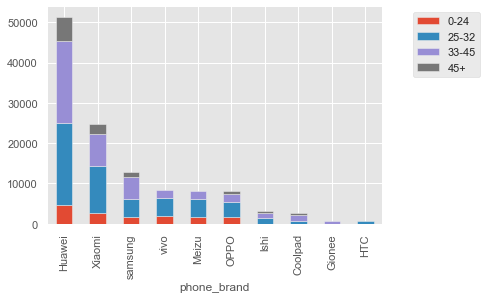

In [87]:
plt.figure(figsize=(20,15))
popularity.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.31,1))
plt.show()

### Top 10 mobile phone brands by age groups (Consider the age groups as 0–24, 25–32, 33–45, 46+.)  with non_Event_data

In [88]:
## Event_data
popularity  = final_non_event_data.groupby(['phone_brand','age_group']).phone_brand.count().nlargest(30).unstack()
print(popularity)

age_group      0-24   25-32   33-45     45+
phone_brand                                
Huawei      1603.00 5324.00 5824.00 2290.00
Xiaomi      1854.00 3861.00 2840.00 1199.00
samsung     1358.00 3604.00 3354.00  969.00
Meizu       1665.00 2703.00 1225.00  391.00
OPPO        1431.00 2268.00 1163.00     NaN
vivo        1051.00 1573.00  755.00     NaN
Coolpad      365.00  930.00 1109.00  419.00
lenovo          NaN  733.00  622.00  465.00
lshi            NaN  430.00     NaN     NaN


<Figure size 1440x1080 with 0 Axes>

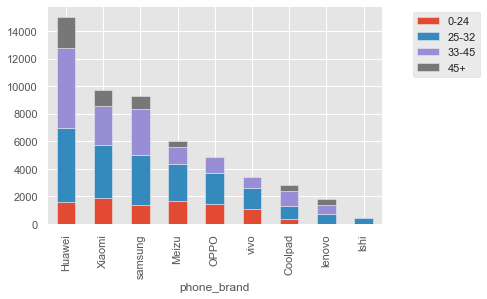

In [89]:
plt.figure(figsize=(20,15))
popularity.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.31,1))
plt.show()

## Feature Engineering

### Before we start feature engineering and as we already have final dataframe, let us delete the dataframes that are not required so the memory consumtion is reduced and better computation can happen

### Also, let us create event data i.e., data with events captured non null event_id (scenario1) and non_event_data
### Let us create and also drop columns not required

In [90]:
del train_event_data
del app_events
del app_events_meta_data
del train_mobile_brand
del merged_app
del merged_events
del temp

## Let's start Feature engineering

### Some device IDs have multiple events in a day or over a period of days.

### Find the average number of events – find the percentage of time the mobile phone was active by calculating the number of events for a device ID.

In [91]:
final_event_data['count_events_perday'] = final_event_data.groupby(['device_id','day','month']).event_id.transform('count')

In [92]:
final_event_data['lat_median'] = final_event_data.groupby(['device_id','day','month']).latitude.transform('median')

In [93]:
final_event_data['long_median'] = final_event_data.groupby(['device_id','day','month']).longitude.transform('median')

In [94]:
final_event_data.head(3)

device_id  event_id  latitude  longitude  day  hour  month  \
2  5872729599536770000 759178.00     25.10      99.16 4.00  3.00   5.00   
3  5872729599536770000 759178.00     25.10      99.16 4.00  3.00   5.00   
4  5872729599536770000 759178.00     25.10      99.16 4.00  3.00   5.00   

  day_name age_group_x gender  age group_train phone_brand device_model  \
2   Friday       25-32      M   32      M25-32      Xiaomi         MI 4   
3   Friday       25-32      M   32      M25-32      Xiaomi         MI 4   
4   Friday       25-32      M   32      M25-32      Xiaomi         MI 4   

  age_group                app_id  is_active label_id     category  \
2     25-32  -5305696816021977482       0.00      178        music   
3     25-32   9112463114311278255       0.00      179        video   
4     25-32  -5839858269967688123       0.00     1015  mobile bank   

   count_events_perday  lat_median  long_median  
2                  284       25.10        99.16  
3                  284       25.10        99.16  
4                  284       25.10        99.16

In [95]:
final_event_data.drop(['latitude', 'longitude'], axis = 1, inplace = True) 

In [96]:
final_event_data.isnull().sum() * 100 / len(final_event_data)

device_id             0.00
event_id              0.00
day                   0.00
hour                  0.00
month                 0.00
day_name              0.00
age_group_x           0.00
gender                0.00
age                   0.00
group_train           0.00
phone_brand           0.00
device_model          0.00
age_group             0.00
app_id                0.00
is_active             0.00
label_id              0.00
category              0.00
count_events_perday   0.00
lat_median            0.00
long_median           0.00
dtype: float64

In [97]:
final_event_data.drop(['age_group_x'], axis = 1, inplace = True) 

In [98]:
len(final_event_data)

128659

In [99]:
final_event_data.head(3)

device_id  event_id  day  hour  month day_name gender  age  \
2  5872729599536770000 759178.00 4.00  3.00   5.00   Friday      M   32   
3  5872729599536770000 759178.00 4.00  3.00   5.00   Friday      M   32   
4  5872729599536770000 759178.00 4.00  3.00   5.00   Friday      M   32   

  group_train phone_brand device_model age_group                app_id  \
2      M25-32      Xiaomi         MI 4     25-32  -5305696816021977482   
3      M25-32      Xiaomi         MI 4     25-32   9112463114311278255   
4      M25-32      Xiaomi         MI 4     25-32  -5839858269967688123   

   is_active label_id     category  count_events_perday  lat_median  \
2       0.00      178        music                  284       25.10   
3       0.00      179        video                  284       25.10   
4       0.00     1015  mobile bank                  284       25.10   

   long_median  
2        99.16  
3        99.16  
4        99.16

## Advanced visualization

### Note will be using 80k data points as due to local computation strength we have taken only 10% data

### Plot the visualization plot for a sample of 80k data points

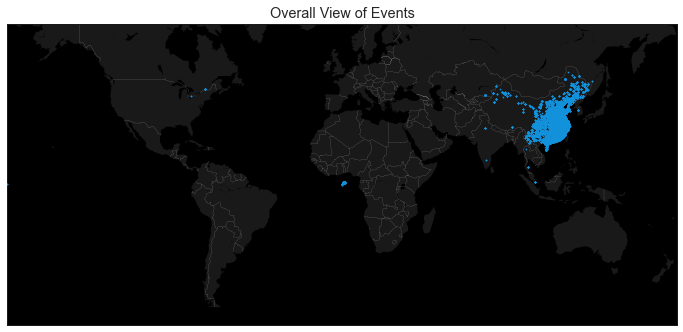

In [100]:
#visualization plot for a sample of 80k data points.
temp = final_event_data.sample(n=80000)
plt.figure(1, figsize=(12, 6))
m1 = Basemap(projection='merc',llcrnrlat=-60,urcrnrlat=65,llcrnrlon=-180,urcrnrlon=180,lat_ts=0,resolution='c')
m1.fillcontinents(color='#191919', lake_color='#000000')
m1.drawmapboundary(fill_color='#000000')
m1.drawcountries(linewidth=0.1, color='w')

mxy = m1(temp['long_median'].tolist(), temp['lat_median'].tolist()) 
m1.scatter(mxy[0], mxy[1], s=3, c='#1292db', lw=0, alpha=1, zorder=5)
plt.title('Overall View of Events')
plt.show()

del temp
del m1

### Compare the event visualization plots based on the users' gender information. (This can be done on the sample of 80k data points.)

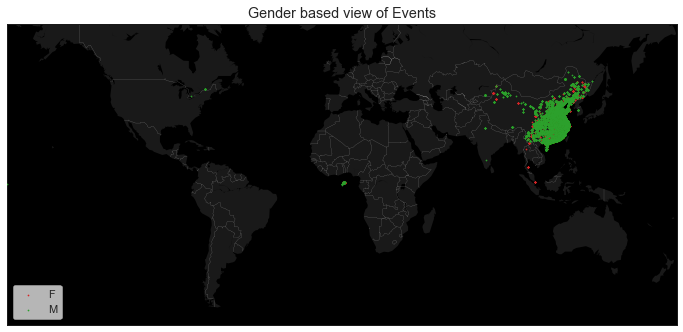

In [101]:
# visualization plots based on the gender information with sample of 80k data points

colors = ['tab:red', 'tab:green']
#colors = ListedColormap(['red', 'green'])

gender = ['F', 'M']

temp = final_event_data.sample(n=80000)
plt.figure(1, figsize=(12, 6))
m1 = Basemap(projection='merc',llcrnrlat=-60,urcrnrlat=65,llcrnrlon=-180,urcrnrlon=180,lat_ts=0,resolution='c')
m1.fillcontinents(color='#191919', lake_color='#000000')
m1.drawmapboundary(fill_color='#000000')
m1.drawcountries(linewidth=0.1, color='w')
i=0
for g in gender:
    temp1 = temp[temp['gender'] == g]
    mxy = m1(temp1['long_median'].tolist(), temp1['lat_median'].tolist())
    scatter = m1.scatter(mxy[0], mxy[1], s=3, c=colors[i] , lw=0, alpha=1, zorder=5, label= g)
    i+=1
    

plt.title('Gender based view of Events')
plt.legend(loc='lower left');

plt.show()
del temp
del temp1
del m1

### Compare the event visualization plots based on the following age groups

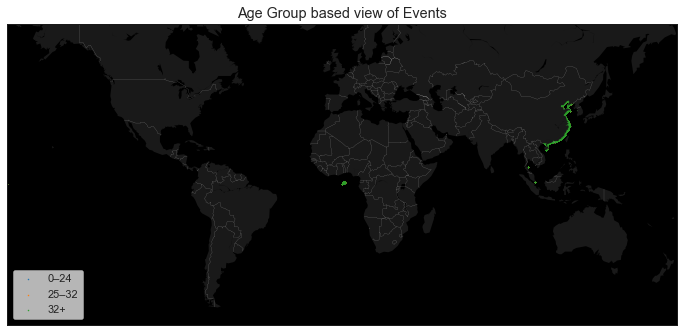

In [102]:
# visualization plot based on the following age groups:0–24 , 25–32 and 32+ for 80k data points

temp = final_event_data.sample(n=80000)
temp['age_group'] = pd.cut(x = temp['age'], bins=[0,24,31,100], \
                                 labels = ['0–24', '25–32', '32+'])

colors = ['tab:blue', 'tab:orange', 'tab:green']
labels = [ '0–24','25–32', '32+']

plt.figure(1, figsize=(12, 6))
m1 = Basemap(projection='merc',llcrnrlat=-60,urcrnrlat=65,llcrnrlon=-180,urcrnrlon=180,lat_ts=0, resolution='c')
m1.fillcontinents(color='#191919', lake_color='#000000')
m1.drawmapboundary(fill_color='#000000')
m1.drawcountries(linewidth=0.1, color='w')
i=0
for label in labels:
    temp1 = temp[temp['age_group'] == label]
    mxy = m1(temp['long_median'].tolist(), temp['lat_median'].tolist())
    scatter = m1.scatter(mxy[0], mxy[1], s=1, c= colors[i], alpha=1, zorder=1, label= label)
    i+=1

plt.title('Age Group based view of Events')

plt.legend(loc='lower left');

plt.show()
del temp
del temp1
del m1

### DBSCAN clustering

In [103]:
## Clustering based on lat_mean and long_mean  
temp = final_event_data[final_event_data['lat_median'] != 0]
coords = np.asmatrix(temp[['lat_median', 'long_median']].fillna(0))
kms_per_radian = 6371.0088
epsilon = 15 / kms_per_radian
db = DBSCAN(eps= epsilon, min_samples=125, algorithm='ball_tree', metric='haversine',n_jobs=-1).fit(np.radians(coords))
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))
temp['cluster'] = cluster_labels
temp.head(2)

Number of clusters: 119


device_id  event_id  day  hour  month day_name gender  age  \
2  5872729599536770000 759178.00 4.00  3.00   5.00   Friday      M   32   
3  5872729599536770000 759178.00 4.00  3.00   5.00   Friday      M   32   

  group_train phone_brand device_model age_group                app_id  \
2      M25-32      Xiaomi         MI 4     25-32  -5305696816021977482   
3      M25-32      Xiaomi         MI 4     25-32   9112463114311278255   

   is_active label_id category  count_events_perday  lat_median  long_median  \
2       0.00      178    music                  284       25.10        99.16   
3       0.00      179    video                  284       25.10        99.16   

   cluster  
2        0  
3        0

In [104]:
final_event_data = final_event_data.merge(temp, on=['event_id','gender','age','group_train'], how='left')
del temp

In [105]:
final_event_data.head(2)

device_id_x  event_id  day_x  hour_x  month_x day_name_x gender  \
0  5872729599536770000 759178.00   4.00    3.00     5.00     Friday      M   
1  5872729599536770000 759178.00   4.00    3.00     5.00     Friday      M   

   age group_train phone_brand_x device_model_x age_group_x  \
0   32      M25-32        Xiaomi           MI 4       25-32   
1   32      M25-32        Xiaomi           MI 4       25-32   

               app_id_x  is_active_x label_id_x category_x  \
0  -5305696816021977482         0.00        178      music   
1  -5305696816021977482         0.00        178      music   

   count_events_perday_x  lat_median_x  long_median_x            device_id_y  \
0                    284         25.10          99.16 5872729599536770048.00   
1                    284         25.10          99.16 5872729599536770048.00   

   day_y  hour_y  month_y day_name_y phone_brand_y device_model_y age_group_y  \
0   4.00    3.00     5.00     Friday        Xiaomi           MI 4       25-32   
1   4.00    3.00     5.00     Friday        Xiaomi           MI 4       25-32   

               app_id_y  is_active_y label_id_y category_y  \
0  -5305696816021977482         0.00        178      music   
1   9112463114311278255         0.00        179      video   

   count_events_perday_y  lat_median_y  long_median_y  cluster  
0                 284.00         25.10          99.16     0.00  
1                 284.00         25.10          99.16     0.00

In [106]:
final_event_data.columns

Index(['device_id_x', 'event_id', 'day_x', 'hour_x', 'month_x', 'day_name_x',
       'gender', 'age', 'group_train', 'phone_brand_x', 'device_model_x',
       'age_group_x', 'app_id_x', 'is_active_x', 'label_id_x', 'category_x',
       'count_events_perday_x', 'lat_median_x', 'long_median_x', 'device_id_y',
       'day_y', 'hour_y', 'month_y', 'day_name_y', 'phone_brand_y',
       'device_model_y', 'age_group_y', 'app_id_y', 'is_active_y',
       'label_id_y', 'category_y', 'count_events_perday_y', 'lat_median_y',
       'long_median_y', 'cluster'],
      dtype='object')

In [107]:
final_event_data.drop(['device_id_x', 'day_x', 'hour_x', 'month_x', 'day_name_x','phone_brand_x', 'device_model_x','age_group_x', 'app_id_x', 'is_active_x', 'label_id_x', 'category_x','count_events_perday_x', 'lat_median_x', 'long_median_x'], axis = 1, inplace = True) 
final_event_data.rename(columns={"device_id_y": "device_id", "day_y": "day", "hour_y": "hour","month_y":"month","day_name_y":"day_name","phone_brand_y":"phone_brand","device_model_y":"device_model","age_group_y":"age_group","app_id_y":"app_id","is_active_y":"is_active","label_id_y":"label_id","category_y":"category","count_events_perday_y":"count_events_perday","lat_median_y":"lat_median","long_median_y":"long_median",}, inplace = True)

In [108]:
final_event_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1728633 entries, 0 to 1728632
Data columns (total 20 columns):
 #   Column               Dtype  
---  ------               -----  
 0   event_id             float64
 1   gender               object 
 2   age                  int64  
 3   group_train          object 
 4   device_id            float64
 5   day                  float64
 6   hour                 float64
 7   month                float64
 8   day_name             object 
 9   phone_brand          object 
 10  device_model         object 
 11  age_group            object 
 12  app_id               object 
 13  is_active            float64
 14  label_id             object 
 15  category             object 
 16  count_events_perday  float64
 17  lat_median           float64
 18  long_median          float64
 19  cluster              float64
dtypes: float64(10), int64(1), object(9)
memory usage: 277.0+ MB


In [109]:
final_event_data.head(2)

event_id gender  age group_train              device_id  day  hour  month  \
0 759178.00      M   32      M25-32 5872729599536770048.00 4.00  3.00   5.00   
1 759178.00      M   32      M25-32 5872729599536770048.00 4.00  3.00   5.00   

  day_name phone_brand device_model age_group                app_id  \
0   Friday      Xiaomi         MI 4     25-32  -5305696816021977482   
1   Friday      Xiaomi         MI 4     25-32   9112463114311278255   

   is_active label_id category  count_events_perday  lat_median  long_median  \
0       0.00      178    music               284.00       25.10        99.16   
1       0.00      179    video               284.00       25.10        99.16   

   cluster  
0     0.00  
1     0.00

## Event Data Final preparation
### Converting gender column to binary

In [110]:
final_event_data['gender'] = final_event_data.gender.map(dict(M=1, F=0))

In [111]:
final_event_data.drop(['age_group'], axis = 1, inplace = True) 

In [112]:
final_event_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1728633 entries, 0 to 1728632
Data columns (total 19 columns):
 #   Column               Dtype  
---  ------               -----  
 0   event_id             float64
 1   gender               int64  
 2   age                  int64  
 3   group_train          object 
 4   device_id            float64
 5   day                  float64
 6   hour                 float64
 7   month                float64
 8   day_name             object 
 9   phone_brand          object 
 10  device_model         object 
 11  app_id               object 
 12  is_active            float64
 13  label_id             object 
 14  category             object 
 15  count_events_perday  float64
 16  lat_median           float64
 17  long_median          float64
 18  cluster              float64
dtypes: float64(10), int64(2), object(7)
memory usage: 263.8+ MB


In [113]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [114]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['hour', 'lat_median', 'long_median', 'cluster']

final_event_data[num_vars] = scaler.fit_transform(final_event_data[num_vars])

In [115]:
final_event_data.isnull().sum() * 100 / len(final_event_data)

event_id              0.00
gender                0.00
age                   0.00
group_train           0.00
device_id             0.00
day                   0.00
hour                  0.00
month                 0.00
day_name              0.00
phone_brand           0.00
device_model          0.00
app_id                0.00
is_active             0.00
label_id              0.00
category              0.00
count_events_perday   0.00
lat_median            0.00
long_median           0.00
cluster               0.00
dtype: float64

In [116]:
final_event_data.head(3)

event_id  gender  age group_train              device_id  day  hour  month  \
0 759178.00       1   32      M25-32 5872729599536770048.00 4.00  0.13   5.00   
1 759178.00       1   32      M25-32 5872729599536770048.00 4.00  0.13   5.00   
2 759178.00       1   32      M25-32 5872729599536770048.00 4.00  0.13   5.00   

  day_name phone_brand device_model                app_id  is_active label_id  \
0   Friday      Xiaomi         MI 4  -5305696816021977482       0.00      178   
1   Friday      Xiaomi         MI 4   9112463114311278255       0.00      179   
2   Friday      Xiaomi         MI 4  -5839858269967688123       0.00     1015   

      category  count_events_perday  lat_median  long_median  cluster  
0        music               284.00        0.49         0.84     0.01  
1        video               284.00        0.49         0.84     0.01  
2  mobile bank               284.00        0.49         0.84     0.01

## Non Event Data Final preparation
### Converting gender column to binary

In [117]:
final_non_event_data['gender'] = final_non_event_data.gender.map(dict(M=1, F=0))

In [118]:
final_non_event_data.drop(['age_group'], axis = 1, inplace = True) 

In [119]:
final_non_event_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60953 entries, 0 to 60952
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   device_id     60953 non-null  int64 
 1   gender        60953 non-null  int64 
 2   age           60953 non-null  int64 
 3   group_train   60953 non-null  object
 4   phone_brand   60953 non-null  object
 5   device_model  60953 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.3+ MB


In [120]:
final_non_event_data.head(3)

device_id  gender  age group_train phone_brand device_model
0  -499923429195376000       0   40        F32+       Meizu       é­…è“
1  3946517152309450000       1   22       M0-24        OPPO        R827T
2 -6206829862008590000       0   34        F32+     samsung       S5830I

In [121]:
final_non_event_data.isnull().sum() * 100 / len(final_non_event_data)

device_id      0.00
gender         0.00
age            0.00
group_train    0.00
phone_brand    0.00
device_model   0.00
dtype: float64

## Scenario-1 : Event Data Modelling


### Note we will be using DictVectorise (Hence will see some changes in approach than recommended)

### The approach is as follows,
### 1.Train split the data 
### 2. Use DictVectorizer with Sparse = True. Through this we can do sparse matrix conversion easily.Hence,c.	DictVectorizer is used to convert column categorical data to sparse matrix data using pipeline in every single model build

In [122]:
train_test_split = pd.read_csv('train_test_split.csv')

In [123]:
train_test_split.head()

device_id gender  age group train_test_flag
0 -7548291590301750000      M   33  M32+           train
1  6943568600617760000      M   37  M32+           train
2  5441349705980020000      M   40  M32+           train
3 -5393876656119450000      M   33  M32+           train
4  4543988487649880000      M   53  M32+           train

In [124]:
train_test_split.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   device_id        74645 non-null  int64 
 1   gender           74645 non-null  object
 2   age              74645 non-null  int64 
 3   group            74645 non-null  object
 4   train_test_flag  74645 non-null  object
dtypes: int64(2), object(3)
memory usage: 2.8+ MB


In [125]:
df_event = final_event_data.merge(train_test_split, on=['device_id'], how='inner')

In [126]:
df_event.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110992 entries, 0 to 110991
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   event_id             110992 non-null  float64
 1   gender_x             110992 non-null  int64  
 2   age_x                110992 non-null  int64  
 3   group_train          110992 non-null  object 
 4   device_id            110992 non-null  float64
 5   day                  110992 non-null  float64
 6   hour                 110992 non-null  float64
 7   month                110992 non-null  float64
 8   day_name             110992 non-null  object 
 9   phone_brand          110992 non-null  object 
 10  device_model         110992 non-null  object 
 11  app_id               110992 non-null  object 
 12  is_active            110992 non-null  float64
 13  label_id             110992 non-null  object 
 14  category             110992 non-null  object 
 15  count_events_perd

In [127]:
df_event.drop(['gender_y','age_y','group'], axis = 1, inplace = True) 
df_event.rename(columns={"gender_x": "gender","age_x":"age"}, inplace = True)

In [128]:
df_event.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110992 entries, 0 to 110991
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   event_id             110992 non-null  float64
 1   gender               110992 non-null  int64  
 2   age                  110992 non-null  int64  
 3   group_train          110992 non-null  object 
 4   device_id            110992 non-null  float64
 5   day                  110992 non-null  float64
 6   hour                 110992 non-null  float64
 7   month                110992 non-null  float64
 8   day_name             110992 non-null  object 
 9   phone_brand          110992 non-null  object 
 10  device_model         110992 non-null  object 
 11  app_id               110992 non-null  object 
 12  is_active            110992 non-null  float64
 13  label_id             110992 non-null  object 
 14  category             110992 non-null  object 
 15  count_events_perd

In [129]:
df_event.isnull().sum() * 100 / len(df_event)

event_id              0.00
gender                0.00
age                   0.00
group_train           0.00
device_id             0.00
day                   0.00
hour                  0.00
month                 0.00
day_name              0.00
phone_brand           0.00
device_model          0.00
app_id                0.00
is_active             0.00
label_id              0.00
category              0.00
count_events_perday   0.00
lat_median            0.00
long_median           0.00
cluster               0.00
train_test_flag       0.00
dtype: float64

In [130]:
train_data = df_event[(df_event.train_test_flag == "train")]

In [131]:
train_data.drop(['train_test_flag','month'], axis = 1, inplace = True) 

In [132]:
train_data.head()

event_id  gender  age group_train             device_id  day  hour  \
0 1443617.00       1   38        M32+ 439484658792160000.00 6.00  0.26   
1 1443617.00       1   38        M32+ 439484658792160000.00 6.00  0.26   
2 1443617.00       1   38        M32+ 439484658792160000.00 6.00  0.26   
3 1443617.00       1   38        M32+ 439484658792160000.00 6.00  0.26   
4 1443617.00       1   38        M32+ 439484658792160000.00 6.00  0.26   

  day_name phone_brand device_model                app_id  is_active label_id  \
0   Sunday     Coolpad          cv1  -3350486353854866204       0.00      266   
1   Sunday     Coolpad          cv1    621106275149666397       0.00      959   
2   Sunday     Coolpad          cv1    621106275149666397       0.00      960   
3   Sunday     Coolpad          cv1    621106275149666397       0.00      548   
4   Sunday     Coolpad          cv1    621106275149666397       0.00     1007   

         category  count_events_perday  lat_median  long_median  cluster  
0  Housing Advice                35.00        0.61         0.94     0.05  
1       financial                35.00        0.61         0.94     0.05  
2             P2P                35.00        0.61         0.94     0.05  
3    Industry tag                35.00        0.61         0.94     0.05  
4    P2P net loan                35.00        0.61         0.94     0.05

In [133]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82864 entries, 0 to 110991
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   event_id             82864 non-null  float64
 1   gender               82864 non-null  int64  
 2   age                  82864 non-null  int64  
 3   group_train          82864 non-null  object 
 4   device_id            82864 non-null  float64
 5   day                  82864 non-null  float64
 6   hour                 82864 non-null  float64
 7   day_name             82864 non-null  object 
 8   phone_brand          82864 non-null  object 
 9   device_model         82864 non-null  object 
 10  app_id               82864 non-null  object 
 11  is_active            82864 non-null  float64
 12  label_id             82864 non-null  object 
 13  category             82864 non-null  object 
 14  count_events_perday  82864 non-null  float64
 15  lat_median           82864 non-null

In [134]:
test_data = df_event[(df_event.train_test_flag == "test")]

In [135]:
test_data.head()

event_id  gender  age group_train             device_id  day  hour  \
613 125081.00       1   25      M25-32 143395565203270000.00 4.00  0.30   
614 125081.00       1   25      M25-32 143395565203270000.00 4.00  0.30   
615 125081.00       1   25      M25-32 143395565203270000.00 4.00  0.30   
616 125081.00       1   25      M25-32 143395565203270000.00 4.00  0.30   
617 125081.00       1   25      M25-32 143395565203270000.00 4.00  0.30   

     month day_name phone_brand device_model               app_id  is_active  \
613   5.00   Friday        vivo        Xplay  6290062395240548114       0.00   
614   5.00   Friday        vivo        Xplay  6290062395240548114       0.00   
615   5.00   Friday        vivo        Xplay  6290062395240548114       0.00   
616   5.00   Friday        vivo        Xplay  6290062395240548114       0.00   
617   5.00   Friday        vivo        Xplay   628020936226491308       1.00   

    label_id      category  count_events_perday  lat_median  long_median  \
613      959     financial                 9.00        0.61         0.88   
614      960           P2P                 9.00        0.61         0.88   
615      548  Industry tag                 9.00        0.61         0.88   
616     1007  P2P net loan                 9.00        0.61         0.88   
617     1003       fashion                 9.00        0.61         0.88   

     cluster train_test_flag  
613     0.00            test  
614     0.00            test  
615     0.00            test  
616     0.00            test  
617     0.00            test

In [136]:
test_data.drop(['train_test_flag','month'], axis = 1, inplace = True) 

In [137]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28128 entries, 613 to 110910
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   event_id             28128 non-null  float64
 1   gender               28128 non-null  int64  
 2   age                  28128 non-null  int64  
 3   group_train          28128 non-null  object 
 4   device_id            28128 non-null  float64
 5   day                  28128 non-null  float64
 6   hour                 28128 non-null  float64
 7   day_name             28128 non-null  object 
 8   phone_brand          28128 non-null  object 
 9   device_model         28128 non-null  object 
 10  app_id               28128 non-null  object 
 11  is_active            28128 non-null  float64
 12  label_id             28128 non-null  object 
 13  category             28128 non-null  object 
 14  count_events_perday  28128 non-null  float64
 15  lat_median           28128 non-nu

In [138]:
train_data.columns

Index(['event_id', 'gender', 'age', 'group_train', 'device_id', 'day', 'hour',
       'day_name', 'phone_brand', 'device_model', 'app_id', 'is_active',
       'label_id', 'category', 'count_events_perday', 'lat_median',
       'long_median', 'cluster'],
      dtype='object')

### Since we are going to build 2 models hence we will not include Age and Gender in input column

In [139]:
input_train_evet_data = train_data.loc[:, ['event_id','group_train', 'device_id', 'day', 'hour',
       'day_name', 'phone_brand', 'device_model', 'app_id', 'is_active',
       'label_id', 'category', 'count_events_perday', 'lat_median',
       'long_median', 'cluster']]

In [140]:
input_train_evet_data.head(3)

event_id group_train             device_id  day  hour day_name  \
0 1443617.00        M32+ 439484658792160000.00 6.00  0.26   Sunday   
1 1443617.00        M32+ 439484658792160000.00 6.00  0.26   Sunday   
2 1443617.00        M32+ 439484658792160000.00 6.00  0.26   Sunday   

  phone_brand device_model                app_id  is_active label_id  \
0     Coolpad          cv1  -3350486353854866204       0.00      266   
1     Coolpad          cv1    621106275149666397       0.00      959   
2     Coolpad          cv1    621106275149666397       0.00      960   

         category  count_events_perday  lat_median  long_median  cluster  
0  Housing Advice                35.00        0.61         0.94     0.05  
1       financial                35.00        0.61         0.94     0.05  
2             P2P                35.00        0.61         0.94     0.05

In [141]:
input_test_evet_data = test_data.loc[:, ['event_id','group_train', 'device_id', 'day', 'hour',
       'day_name', 'phone_brand', 'device_model', 'app_id', 'is_active',
       'label_id', 'category', 'count_events_perday', 'lat_median',
       'long_median', 'cluster']]

In [142]:
input_test_evet_data.head(3)

event_id group_train             device_id  day  hour day_name  \
613 125081.00      M25-32 143395565203270000.00 4.00  0.30   Friday   
614 125081.00      M25-32 143395565203270000.00 4.00  0.30   Friday   
615 125081.00      M25-32 143395565203270000.00 4.00  0.30   Friday   

    phone_brand device_model               app_id  is_active label_id  \
613        vivo        Xplay  6290062395240548114       0.00      959   
614        vivo        Xplay  6290062395240548114       0.00      960   
615        vivo        Xplay  6290062395240548114       0.00      548   

         category  count_events_perday  lat_median  long_median  cluster  
613     financial                 9.00        0.61         0.88     0.00  
614           P2P                 9.00        0.61         0.88     0.00  
615  Industry tag                 9.00        0.61         0.88     0.00

In [143]:
ytrain_gender = train_data['gender']

In [144]:
ytest_gender = test_data['gender']

In [145]:
ytrain_age = train_data['age']

In [146]:
ytest_age = test_data['age']

### We will convert the data to dictionary format 
### Then, make use DictVectorisation method for Sparsing categorical data in pipe line itself of every model so we need not have to fit and fransform separately

In [147]:
vec = DictVectorizer(sparse=True)

In [148]:
X_dict = input_train_evet_data.to_dict(orient='records')

In [149]:
Xtest_dict = input_test_evet_data.to_dict(orient='records')

### Logistic and RandomForest model for Gender prediction

In [150]:
lr_gender= LogisticRegression(penalty='l1',solver='saga',random_state=0)

In [151]:
lr_gender_pipe = make_pipeline(vec, lr_gender)
lr_gender_pipe.fit(X_dict, ytrain_gender)

Pipeline(steps=[('dictvectorizer', DictVectorizer()),
                ('logisticregression',
                 LogisticRegression(penalty='l1', random_state=0,
                                    solver='saga'))])

###  Train accuracy and Test accuracy metrices

In [152]:
y_train_pred = lr_gender_pipe.predict(X_dict)

In [153]:
print("train accuracy: ",metrics.accuracy_score(ytrain_gender, y_train_pred))

train accuracy:  0.6104581000193088


### Logistic Regression Gender Model Building & Evaluation

### Accuracy & Confusion matrix

test accuracy 0.6011092150170648
[[  836  1223]
 [ 9997 16072]]


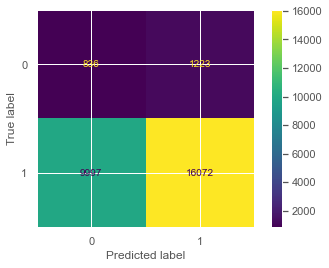

In [154]:
y_pred = lr_gender_pipe.predict(Xtest_dict)
print("test accuracy",metrics.accuracy_score(ytest_gender, y_pred))
# Plot and print confusion matrix
cnf_matrix = metrics.confusion_matrix(ytest_gender, y_pred)
print(cnf_matrix)
metrics.plot_confusion_matrix(lr_gender_pipe, Xtest_dict, ytest_gender)
plt.show()

### F1 Score, Precision, Recall

In [155]:
print(classification_report(ytest_gender, y_pred))

              precision    recall  f1-score   support

           0       0.08      0.41      0.13      2059
           1       0.93      0.62      0.74     26069

    accuracy                           0.60     28128
   macro avg       0.50      0.51      0.44     28128
weighted avg       0.87      0.60      0.70     28128



### ROC curve and AUC

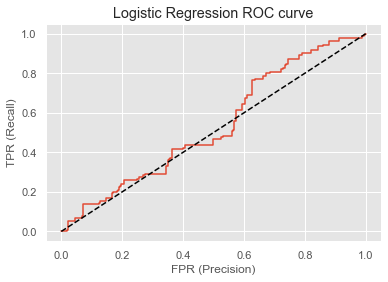

In [156]:
lr_probability =lr_gender_pipe.predict_proba(Xtest_dict)[:,1]
fpr, tpr,_ = roc_curve(ytest_gender, lr_probability,)
plt.title('Logistic Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')
plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

## Random Forest Gender Model Building & Evaluation

In [157]:
RF_gender = RandomForestClassifier(random_state=42, n_estimators=10,max_depth=4,n_jobs=-1)

In [158]:
RF_gender_pipe = make_pipeline(vec, RF_gender)

In [159]:
RF_gender_pipe.fit(X_dict, ytrain_gender)

Pipeline(steps=[('dictvectorizer', DictVectorizer()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=4, n_estimators=10, n_jobs=-1,
                                        random_state=42))])

### Random Forest Train accuracy and Test accuracy metrices

In [160]:
y_train_pred = RF_gender_pipe.predict(X_dict)

In [161]:
print("train accuracy: ",metrics.accuracy_score(ytrain_gender, y_train_pred))

train accuracy:  0.9249372465726974


test accuracy:  0.9532494311717861
[[  744  1315]
 [    0 26069]]


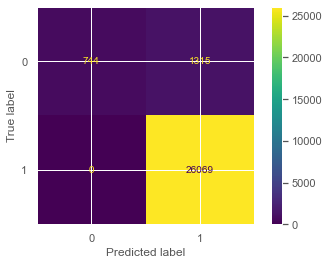

In [162]:
y_pred = RF_gender_pipe.predict(Xtest_dict)
print("test accuracy: ", metrics.accuracy_score(ytest_gender, y_pred))
# Plot and print confusion matrix
cnf_matrix = metrics.confusion_matrix(ytest_gender, y_pred)
print(cnf_matrix)
metrics.plot_confusion_matrix(RF_gender_pipe, Xtest_dict, ytest_gender)
plt.show()

In [163]:
print(classification_report(ytest_gender, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.36      0.53      2059
           1       0.95      1.00      0.98     26069

    accuracy                           0.95     28128
   macro avg       0.98      0.68      0.75     28128
weighted avg       0.96      0.95      0.94     28128



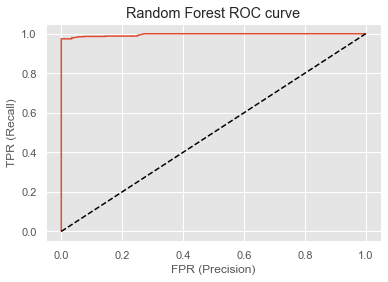

In [164]:
lr_probability =RF_gender_pipe.predict_proba(Xtest_dict)[:,1]
fpr, tpr,_ = roc_curve(ytest_gender, lr_probability,)
plt.title('Random Forest ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')
plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

## Scenario-1 Gender Model Stacking

## XGB Preparation for meta leaner

### Only using the parameter that are possible to withstand the local system computation

In [165]:
params = {

    'min_child_weight': [1, 5],

    'gamma': [0.5, 1],

    'subsample': [0.6, 0.8],

    'max_depth': [3, 4],

    'n_estimators': [5,6],

    'learning_rate': [0.1, 0.2]

 }

In [166]:
xgbClass = XGBClassifier()

In [167]:
XGB = GridSearchCV(xgbClass, params, n_jobs =-1,return_train_score=True, verbose=True)

In [168]:
stacking_gender = StackingCVClassifier(classifiers=[lr_gender, RF_gender], meta_classifier=XGB, use_probas=True, cv=3)

In [169]:
# Fit on train data
stacking_gender_pipe = make_pipeline(vec, stacking_gender)
stacking_gender_pipe.fit(X_dict, ytrain_gender)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


Pipeline(steps=[('dictvectorizer', DictVectorizer()),
                ('stackingcvclassifier',
                 StackingCVClassifier(classifiers=[LogisticRegression(penalty='l1',
                                                                      random_state=0,
                                                                      solver='saga'),
                                                   RandomForestClassifier(max_depth=4,
                                                                          n_estimators=10,
                                                                          n_jobs=-1,
                                                                          random_state=42)],
                                      cv=3,
                                      meta_classifier=GridSearchCV(estimator=XGBClassifier(base_score=None,
                                                                                           booster=None,
                                    

### Train and Test Accuracy scores metrices

In [170]:
y_train_pred = stacking_gender_pipe.predict(X_dict)

In [171]:
print("train accuracy: ",metrics.accuracy_score(ytrain_gender, y_train_pred))

train accuracy:  0.9850477891484842


test accuracy:  0.9761447667804323
[[ 2059     0]
 [  671 25398]]


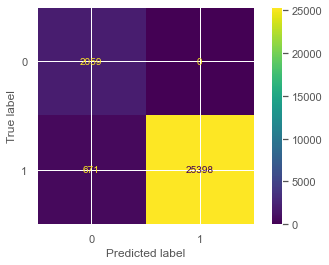

In [172]:
y_pred = stacking_gender_pipe.predict(Xtest_dict)
print("test accuracy: ",metrics.accuracy_score(ytest_gender, y_pred))
# Plot and print confusion matrix
cnf_matrix = metrics.confusion_matrix(ytest_gender, y_pred)
print(cnf_matrix)
metrics.plot_confusion_matrix(stacking_gender_pipe, Xtest_dict, ytest_gender)
plt.show()

In [173]:
print(classification_report(ytest_gender, y_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      2059
           1       1.00      0.97      0.99     26069

    accuracy                           0.98     28128
   macro avg       0.88      0.99      0.92     28128
weighted avg       0.98      0.98      0.98     28128



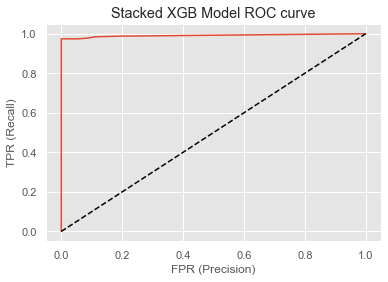

In [174]:
lr_probability =stacking_gender_pipe.predict_proba(Xtest_dict)[:,1]
fpr, tpr,_ = roc_curve(ytest_gender, lr_probability,)
plt.title('Stacked XGB Model ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')
plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

## Scenario-1 Linear Regression And RandomForest model for age prediction

## Linear Regression Age Model Building & Evaluation

In [175]:
lr_age= LinearRegression()

In [176]:
# Fit on train data
lr_age_pipe = make_pipeline(vec, lr_age)
lr_age_pipe.fit(X_dict, ytrain_age)

Pipeline(steps=[('dictvectorizer', DictVectorizer()),
                ('linearregression', LinearRegression())])

In [177]:
ypred = lr_age_pipe.predict(Xtest_dict)
mse = mean_squared_error(ytest_age, ypred)
r_squared = r2_score(ytest_age, ypred)
rsme = math.sqrt(mse) 

In [178]:
print('Mean_Squared_Error :' ,mse)
print('Root Squared mean_Error :' ,rsme)
print('r_square_value :',r_squared)

Mean_Squared_Error : 288.79967556956956
Root Squared mean_Error : 16.99410708362077
r_square_value : -2.1738318858362673


## Random forest Regression Age Model Building & Evaluation

In [179]:
RF_age = RandomForestRegressor(random_state=42,n_estimators = 100, min_samples_split = 15, min_samples_leaf= 4, max_features = 'sqrt', max_depth= 150, bootstrap=True)

In [180]:
# Fit on train data
RF_age_pipe = make_pipeline(vec, RF_age)
RF_age_pipe.fit(X_dict, ytrain_age)

Pipeline(steps=[('dictvectorizer', DictVectorizer()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=150, max_features='sqrt',
                                       min_samples_leaf=4, min_samples_split=15,
                                       random_state=42))])

In [181]:
ypred = RF_age_pipe.predict(Xtest_dict)
mse = mean_squared_error(ytest_age, ypred)
r_squared = r2_score(ytest_age, ypred)
rsme = math.sqrt(mse) 

In [182]:
print('Mean_Squared_Error :' ,mse)
print('Root Squared mean_Error :' ,rsme)
print('r_square_value :',r_squared)

Mean_Squared_Error : 177.99699808358486
Root Squared mean_Error : 13.34155156207796
r_square_value : -0.9561398294047976


## Scenario-1 Stack model for age - Model Building and Evaluation

In [183]:
xgbreg = XGBRegressor()
XGBREG = GridSearchCV(xgbreg, params, n_jobs =-1,return_train_score=True, verbose=True)

In [184]:
stacking_age = StackingCVRegressor(regressors=[lr_age,RF_age], meta_regressor=XGBREG, cv=3)

In [185]:
# Fit on train data
stacking_age_pipe = make_pipeline(vec, stacking_age)
stacking_age_pipe.fit(X_dict, ytrain_age)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


Pipeline(steps=[('dictvectorizer', DictVectorizer()),
                ('stackingcvregressor',
                 StackingCVRegressor(cv=3,
                                     meta_regressor=GridSearchCV(estimator=XGBRegressor(base_score=None,
                                                                                        booster=None,
                                                                                        callbacks=None,
                                                                                        colsample_bylevel=None,
                                                                                        colsample_bynode=None,
                                                                                        colsample_bytree=None,
                                                                                        early_stopping_rounds=None,
                                                                                        enable_categor

In [186]:
ypred = stacking_age_pipe.predict(Xtest_dict)
mse = mean_squared_error(ytest_age, ypred)
r_squared = r2_score(ytest_age, ypred)
rsme = math.sqrt(mse) 

In [187]:
print('Mean_Squared_Error :' ,mse)
print('Root Squared mean_Error :' ,rsme)
print('r_square_value :',r_squared)

Mean_Squared_Error : 494.3100565904452
Root Squared mean_Error : 22.233084729529665
r_square_value : -4.432336501078789


## Scenario-2 non_event data modelling


### Note we will be using DictVectorise (Hence will see some changes in approach than recommended)

### The approach is as follows,
### 1.Train split the data 
### 2. Use DictVectorizer with Sparse = True. Through this we can do sparse matrix conversion easily.Hence, i will be doing data split and then sparse the input data

In [188]:
df_nonevent = final_non_event_data.merge(train_test_split, on=['device_id'], how='inner')

In [189]:
df_nonevent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60953 entries, 0 to 60952
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   device_id        60953 non-null  int64 
 1   gender_x         60953 non-null  int64 
 2   age_x            60953 non-null  int64 
 3   group_train      60953 non-null  object
 4   phone_brand      60953 non-null  object
 5   device_model     60953 non-null  object
 6   gender_y         60953 non-null  object
 7   age_y            60953 non-null  int64 
 8   group            60953 non-null  object
 9   train_test_flag  60953 non-null  object
dtypes: int64(4), object(6)
memory usage: 5.1+ MB


In [190]:
df_nonevent.drop(['gender_y','age_y','group'], axis = 1, inplace = True) 

In [191]:
df_nonevent.rename(columns={"gender_x": "gender","age_x":"age"}, inplace = True)

In [192]:
df_nonevent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60953 entries, 0 to 60952
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   device_id        60953 non-null  int64 
 1   gender           60953 non-null  int64 
 2   age              60953 non-null  int64 
 3   group_train      60953 non-null  object
 4   phone_brand      60953 non-null  object
 5   device_model     60953 non-null  object
 6   train_test_flag  60953 non-null  object
dtypes: int64(3), object(4)
memory usage: 3.7+ MB


In [193]:
df_nonevent.isnull().sum() * 100 / len(df_nonevent)

device_id         0.00
gender            0.00
age               0.00
group_train       0.00
phone_brand       0.00
device_model      0.00
train_test_flag   0.00
dtype: float64

In [194]:
train_data_nonevent = df_nonevent[(df_nonevent.train_test_flag == "train")]

In [195]:
train_data_nonevent.drop(['train_test_flag'], axis = 1, inplace = True) 

In [196]:
train_data_nonevent.head(3)

device_id  gender  age group_train phone_brand   device_model
1  3946517152309450000       1   22       M0-24        OPPO          R827T
2 -6206829862008590000       0   34        F32+     samsung         S5830I
3 -3414553946043800000       1   27      M25-32     samsung  Galaxy Note 3

In [197]:
test_data_nonevent = df_nonevent[(df_nonevent.train_test_flag == "test")]

In [198]:
test_data_nonevent.drop(['train_test_flag'], axis = 1, inplace = True) 

In [199]:
test_data_nonevent.head(3)

device_id  gender  age group_train phone_brand  \
0  -499923429195376000       0   40        F32+       Meizu   
6  4561183983846090000       1   28      M25-32      Huawei   
7 -1569788005142200000       1   30      M25-32     samsung   

          device_model  
0               é­…è“  
6    è£è€€3Xç•…çŽ©ç‰ˆ  
7  Galaxy Trend DUOS 2

In [200]:
ytrain_gender_nonevent = train_data_nonevent['gender']
ytest_gender_nonevent = test_data_nonevent['gender']
ytrain_age_nonevent = train_data_nonevent['age']
ytest_age_nonevent = test_data_nonevent['age']

### Since we are going to build 2 models hence we will not include Age and Gender in input column

In [201]:
input_train_nonevent_data = train_data_nonevent.loc[:, ['phone_brand', 'device_model','group_train','device_id']]

In [202]:
input_train_nonevent_data.head(3)

phone_brand   device_model group_train            device_id
1        OPPO          R827T       M0-24  3946517152309450000
2     samsung         S5830I        F32+ -6206829862008590000
3     samsung  Galaxy Note 3      M25-32 -3414553946043800000

In [203]:
input_test_nonevent_data = test_data_nonevent.loc[:, ['phone_brand', 'device_model','group_train','device_id']]

In [204]:
input_test_nonevent_data.head(3)

phone_brand         device_model group_train            device_id
0       Meizu               é­…è“        F32+  -499923429195376000
6      Huawei    è£è€€3Xç•…çŽ©ç‰ˆ      M25-32  4561183983846090000
7     samsung  Galaxy Trend DUOS 2      M25-32 -1569788005142200000

In [205]:
X_dict_nonevent = input_train_nonevent_data.to_dict(orient='records')
Xtest_dict_nonevent = input_test_nonevent_data.to_dict(orient='records')

## Scenario-2: Logistic regression & RandomForest (Gender)

## Scenario -2 Logistic Regression Model Building & evaluation

In [206]:
Scenario2_lr_gender= LogisticRegression(penalty='l1',solver='saga',random_state=0)

In [207]:
Scenario2_lr_gender_pipe = make_pipeline(vec, Scenario2_lr_gender)
Scenario2_lr_gender_pipe.fit(X_dict_nonevent, ytrain_gender_nonevent)

Pipeline(steps=[('dictvectorizer', DictVectorizer()),
                ('logisticregression',
                 LogisticRegression(penalty='l1', random_state=0,
                                    solver='saga'))])

### Train and Test accuracy metrices

In [208]:
y_train_pred = Scenario2_lr_gender_pipe.predict(X_dict_nonevent)

In [209]:
print("Train accuracy: ",metrics.accuracy_score(ytrain_gender_nonevent, y_train_pred))

Train accuracy:  0.5106910039113429


Test accuracy:  0.504319292841358
[[2563 2405]
 [4997 4968]]


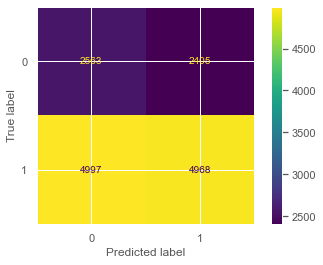

In [210]:
y_pred = Scenario2_lr_gender_pipe.predict(Xtest_dict_nonevent)
print("Test accuracy: ",metrics.accuracy_score(ytest_gender_nonevent, y_pred))
# Plot and print confusion matrix
cnf_matrix = metrics.confusion_matrix(ytest_gender_nonevent, y_pred)
print(cnf_matrix)
metrics.plot_confusion_matrix(Scenario2_lr_gender_pipe, Xtest_dict_nonevent, ytest_gender_nonevent)
plt.show()

In [211]:
print(classification_report(ytest_gender_nonevent, y_pred))

              precision    recall  f1-score   support

           0       0.34      0.52      0.41      4968
           1       0.67      0.50      0.57      9965

    accuracy                           0.50     14933
   macro avg       0.51      0.51      0.49     14933
weighted avg       0.56      0.50      0.52     14933



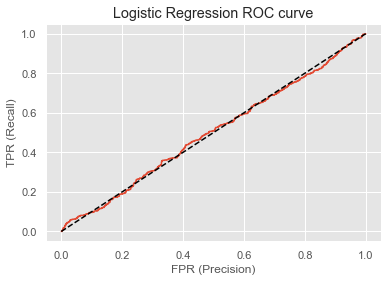

In [212]:
lr_probability =Scenario2_lr_gender_pipe.predict_proba(Xtest_dict_nonevent)[:,1]
fpr, tpr,_ = roc_curve(ytest_gender_nonevent, lr_probability,)
plt.title('Logistic Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')
plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

### Scenario-2 Random Forest model build and evaluation (gender)

In [213]:
Scenario2_RF_g = RandomForestClassifier(random_state=42, n_estimators=10,max_depth=4,n_jobs=-1)

In [214]:
Scenario2_RF_g_pipe = make_pipeline(vec, Scenario2_RF_g)
Scenario2_RF_g_pipe.fit(X_dict_nonevent, ytrain_gender_nonevent)

Pipeline(steps=[('dictvectorizer', DictVectorizer()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=4, n_estimators=10, n_jobs=-1,
                                        random_state=42))])

### Train and Test acuuracy metrices

In [215]:
y_train_pred = Scenario2_RF_g_pipe.predict(X_dict_nonevent)

In [216]:
print("Train accuracy: ",metrics.accuracy_score(ytrain_gender_nonevent, y_train_pred))

Train accuracy:  0.8126249456757931


Test accuracy:  0.8091475256144111
[[2118 2850]
 [   0 9965]]


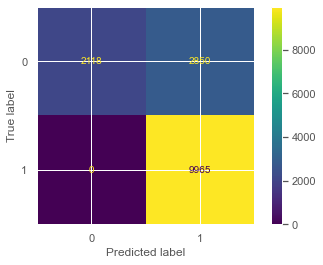

In [217]:
y_pred = Scenario2_RF_g_pipe.predict(Xtest_dict_nonevent)
print("Test accuracy: ",metrics.accuracy_score(ytest_gender_nonevent, y_pred))
# Plot and print confusion matrix
cnf_matrix = metrics.confusion_matrix(ytest_gender_nonevent, y_pred)
print(cnf_matrix)
metrics.plot_confusion_matrix(Scenario2_RF_g_pipe, Xtest_dict_nonevent, ytest_gender_nonevent)
plt.show()

In [218]:
print(classification_report(ytest_gender_nonevent, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60      4968
           1       0.78      1.00      0.87      9965

    accuracy                           0.81     14933
   macro avg       0.89      0.71      0.74     14933
weighted avg       0.85      0.81      0.78     14933



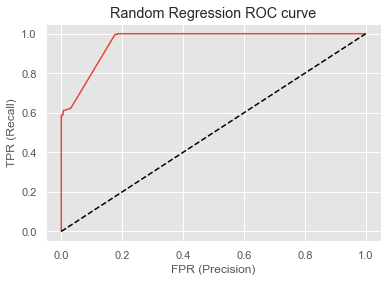

In [219]:
lr_probability =Scenario2_RF_g_pipe.predict_proba(Xtest_dict_nonevent)[:,1]
fpr, tpr,_ = roc_curve(ytest_gender_nonevent, lr_probability,)
plt.title('Random Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')
plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

## Scenario-2 Stacking Model Gender (Building and Evaluation)

In [220]:
## Stacking gender
Scenario2_stacking_gender = StackingCVClassifier(classifiers=[Scenario2_lr_gender, Scenario2_RF_g], meta_classifier=XGB, use_probas=True, cv=3)

In [221]:
# Fit on train data
Scenario2_stacking_gender_pipe = make_pipeline(vec, Scenario2_stacking_gender)
Scenario2_stacking_gender_pipe.fit(X_dict_nonevent, ytrain_gender_nonevent)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


Pipeline(steps=[('dictvectorizer', DictVectorizer()),
                ('stackingcvclassifier',
                 StackingCVClassifier(classifiers=[LogisticRegression(penalty='l1',
                                                                      random_state=0,
                                                                      solver='saga'),
                                                   RandomForestClassifier(max_depth=4,
                                                                          n_estimators=10,
                                                                          n_jobs=-1,
                                                                          random_state=42)],
                                      cv=3,
                                      meta_classifier=GridSearchCV(estimator=XGBClassifier(base_score=None,
                                                                                           booster=None,
                                    

### Train and Test accuracy metrices

In [222]:
y_train_pred = Scenario2_stacking_gender_pipe.predict(X_dict_nonevent)

In [223]:
print("Train accuracy: ",metrics.accuracy_score(ytrain_gender_nonevent, y_train_pred))

Train accuracy:  0.9308996088657105


Test Accuracy:  0.9254001205384049
[[4199  769]
 [ 345 9620]]


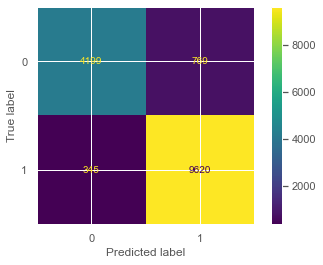

In [224]:
y_pred = Scenario2_stacking_gender_pipe.predict(Xtest_dict_nonevent)
print("Test Accuracy: ",metrics.accuracy_score(ytest_gender_nonevent, y_pred))
# Plot and print confusion matrix
cnf_matrix = metrics.confusion_matrix(ytest_gender_nonevent, y_pred)
print(cnf_matrix)
metrics.plot_confusion_matrix(Scenario2_stacking_gender_pipe, Xtest_dict_nonevent, ytest_gender_nonevent)
plt.show()

In [225]:
print(classification_report(ytest_gender_nonevent, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88      4968
           1       0.93      0.97      0.95      9965

    accuracy                           0.93     14933
   macro avg       0.93      0.91      0.91     14933
weighted avg       0.93      0.93      0.92     14933



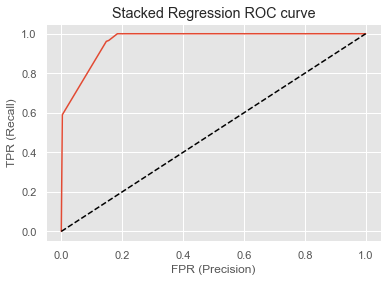

In [226]:
lr_probability =Scenario2_stacking_gender_pipe.predict_proba(Xtest_dict_nonevent)[:,1]
fpr, tpr,_ = roc_curve(ytest_gender_nonevent, lr_probability,)
plt.title('Stacked Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')
plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

## Scenario-2 Linear Regression And RandomForest model for age prediction

### Scenario-2 Linear Regression Model Building & Evaluation (age)

In [227]:
Sceanrio2_lr_age= LinearRegression()

In [228]:
# Fit on train data
Sceanrio2_lr_age_pipe = make_pipeline(vec, Sceanrio2_lr_age)
Sceanrio2_lr_age_pipe.fit(X_dict_nonevent, ytrain_age_nonevent)

Pipeline(steps=[('dictvectorizer', DictVectorizer()),
                ('linearregression', LinearRegression())])

In [229]:
ypred = Sceanrio2_lr_age_pipe.predict(Xtest_dict_nonevent)
mse = mean_squared_error(ytest_age_nonevent, ypred)
r_squared = r2_score(ytest_age_nonevent, ypred)
rsme = math.sqrt(mse) 
print('Mean_Squared_Error :' ,mse)
print('Root Squared mean_Error :' ,rsme)
print('r_square_value :',r_squared)

Mean_Squared_Error : 94.05383169996855
Root Squared mean_Error : 9.698135475439006
r_square_value : -0.0009663985791381613


### Scenario-2 Random forest Regression model building & evaluation(age)

In [230]:
Sceanrio2_RF_a = RandomForestRegressor(random_state=0, n_estimators=20,max_depth=100,min_samples_split =10, min_samples_leaf= 15,n_jobs=-1)

In [231]:
# Fit on train data
Sceanrio2_RF_age_pipe = make_pipeline(vec, Sceanrio2_RF_a)
Sceanrio2_RF_age_pipe.fit(X_dict_nonevent, ytrain_age_nonevent)

Pipeline(steps=[('dictvectorizer', DictVectorizer()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=100, min_samples_leaf=15,
                                       min_samples_split=10, n_estimators=20,
                                       n_jobs=-1, random_state=0))])

In [232]:
ypred = Sceanrio2_RF_age_pipe.predict(Xtest_dict_nonevent)
mse = mean_squared_error(ytest_age_nonevent, ypred)
r_squared = r2_score(ytest_age_nonevent, ypred)
rsme = math.sqrt(mse) 
print('Mean_Squared_Error :' ,mse)
print('Root Squared mean_Error :' ,rsme)
print('r_square_value :',r_squared)

Mean_Squared_Error : 33.215236754523524
Root Squared mean_Error : 5.7632661533650795
r_square_value : 0.6465073744343799


### Scenario-2 Stacking model building & evaluation(age)

In [233]:
Scenario2_stacking_age = StackingCVRegressor(regressors=[Sceanrio2_lr_age,Sceanrio2_RF_a], meta_regressor=XGBREG, cv=3)

In [234]:
# Fit on train data
Scenario2_stacking_age_pipe = make_pipeline(vec, Scenario2_stacking_age)
Scenario2_stacking_age_pipe.fit(X_dict_nonevent, ytrain_age_nonevent)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


Pipeline(steps=[('dictvectorizer', DictVectorizer()),
                ('stackingcvregressor',
                 StackingCVRegressor(cv=3,
                                     meta_regressor=GridSearchCV(estimator=XGBRegressor(base_score=None,
                                                                                        booster=None,
                                                                                        callbacks=None,
                                                                                        colsample_bylevel=None,
                                                                                        colsample_bynode=None,
                                                                                        colsample_bytree=None,
                                                                                        early_stopping_rounds=None,
                                                                                        enable_categor

In [235]:
ypred = Scenario2_stacking_age_pipe.predict(Xtest_dict_nonevent)
mse = mean_squared_error(ytest_age_nonevent, ypred)
r_squared = r2_score(ytest_age_nonevent, ypred)
rsme = math.sqrt(mse) 
print('Mean_Squared_Error :' ,mse)
print('Root Squared mean_Error :' ,rsme)
print('r_square_value :',r_squared)

Mean_Squared_Error : 110.27068493460831
Root Squared mean_Error : 10.500984950689546
r_square_value : -0.1735539995856077


### 50 device_id data

### Importing pickel and saving the model

### We will b e choosing Random Forest model for Gender prediction in scenario-1
### We will do modellingagain so that the model remembers the data properly

In [236]:
RF_age_final_model = RandomForestRegressor(random_state=42,n_estimators = 100, min_samples_split = 15, min_samples_leaf= 4, max_features = 'sqrt', max_depth= 150, bootstrap=True)
# Fit on train data
RF_age_pipe = make_pipeline(vec, RF_age_final_model)
RF_age_pipe.fit(X_dict, ytrain_age)

Pipeline(steps=[('dictvectorizer', DictVectorizer()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=150, max_features='sqrt',
                                       min_samples_leaf=4, min_samples_split=15,
                                       random_state=42))])

In [237]:
import pickle

In [238]:
pickle.dump(RF_age_pipe,open("model_age.pkl","wb"))

In [239]:
pickle.dump(input_test_evet_data, open("test_data.pkl","wb"))

In [240]:
lr = pickle.load(open("model_age.pkl","rb"))
testData = pickle.load(open("test_data.pkl","rb"))

-----------------------------------------------------------END-----------------------------------------------------------------